In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import bin_tools
from wotan import flatten
import time
from OrionPY import OrionTools, Tools


In [2]:
# Loading data
data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)

In [3]:
lc = []

for i in data:
    idx = (~np.isnan(i[:,1])) & (i[:,1] > 0.)
    i = i[idx]
    lc.append(i)

lc = [x for x in lc if not x.shape == (0,3)]
print(np.size(lc))
index_keep = [i for i, j in enumerate(lc) if not j.shape == (0,3) ]

8913


/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [4]:
# Putting in a list
# lc = [x for x in data]

In [5]:
# calculating mean and rms of magnitudes
mean_mag = np.zeros(np.size(lc))
rms_mag = np.zeros(np.size(lc))

for i, j in enumerate(lc):
        magnitudes = -2.5 * np.log10(j[:,1]) + 20.2
        mean_mag[i] = np.nanmean(magnitudes)
#         print(mean_mag[i])
        rms_mag[i] = np.sqrt(np.mean(np.square(mean_mag[i] - magnitudes)))
#         print(rms_mag[i])

In [6]:

def detrend(lightcurve, window = 0.125):
    flatten_lc, trend_lc = flatten(
        lightcurve[:,0],                 # Array of time values
        lightcurve[:,1],                 # Array of flux values
        method='lowess',
        window_length = window,    # The length of the filter window in units of ``time`` - 3 hours = 0.125
        break_tolerance = 1,    # Split into segments at breaks longer than that
        return_trend=True,    # Return trend and flattened light curve
        )
    return np.array((flatten_lc, trend_lc))



In [25]:
window = 0.125
lc_2 = lc[365]
x = flatten(
        lc_2[:,0],                 # Array of time values
        lc_2[:,1],                 # Array of flux values
        method='lowess',
        window_length = window,    # The length of the filter window in units of ``time`` - 3 hours = 0.125
        break_tolerance = 1,    # Split into segments at breaks longer than that
        return_trend=True,    # Return trend and flattened light curve
        )

In [45]:
%%time
window = 30
lc_3 = lc[365]
y = flatten(lc_3[:,0], lc_3[:,1], method='lowess', window_length = window, return_trend=True)
print(y[1])

[3156.35055655 3156.35002651 3156.34949604 ... 3146.96540092 3146.96429295
 3146.96364831]
CPU times: user 5.74 s, sys: 187 ms, total: 5.92 s
Wall time: 6.04 s


In [41]:
## y = detrend(lc_3, window = 0.125)
print(y)

(array([1.00496372, 1.00083598, 0.99894309, ..., 1.00126939, 1.00053874,
       0.99812326]), array([3144.30138852, 3152.52446539, 3157.36929448, ..., 3144.18190052,
       3144.10229201, 3144.06880262]))


<IPython.core.display.Javascript object>


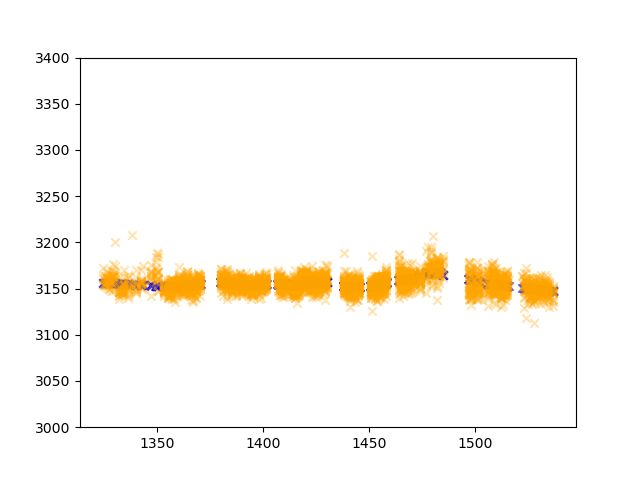

In [46]:
%matplotlib notebook
plt.scatter(lc_3[:,0], y[1],  marker='x', alpha = 0.3, color='blue')
plt.scatter(lc_3[:,0], lc_3[:,1], marker='x', alpha = 0.3, color='orange')
plt.ylim(3000, 3400)
plt.show()


In [32]:
magnitudes =  -2.5*np.log10(y[1])
mean_magnitude = np.nanmean(magnitudes)
rms_mag = np.sqrt(np.nanmean((magnitudes-mean_magnitude)**2))
print(mean_magnitude)
print(rms_mag)

-8.747622424638068
0.002115699639009237


In [33]:
magnitudes =  -2.5*np.log10(lc_3[:,1])
mean_magnitude = np.nanmean(magnitudes)
rms_mag = np.sqrt(np.nanmean((magnitudes-mean_magnitude)**2))
print(mean_magnitude)
print(rms_mag)

-8.7476094418232
0.0026856130689664956


In [ ]:
# It's working for individual stars. Runs ruper fast post a first run on any object. The rms value decreases with increasing window length as it averages everything out to the average.